In [1]:
import numpy as np

m=50
n=2
outliers_num=10
np.random.seed(314)
A = 3000*np.random.rand(n,m)
A[:,:outliers_num] += 3000
p = (10*np.random.rand(m,1)+10).round()
alpha = 0.01
gamma = 1.2
eta1 = 20
eta2 = 30
mu1 = 2
mu2 = 5

In [2]:
print(f"Shape of A: {A.shape}") 
print(f"Shape of p: {p.shape}")

Shape of A: (2, 50)
Shape of p: (50, 1)


Optimal value for A: 16382.693745365377
Optimal x_A: [1662.00851244 1613.78600109]
Optimal value for B: 26250.468365180855
Optimal x_B: [2356.74890495 2220.00465292]


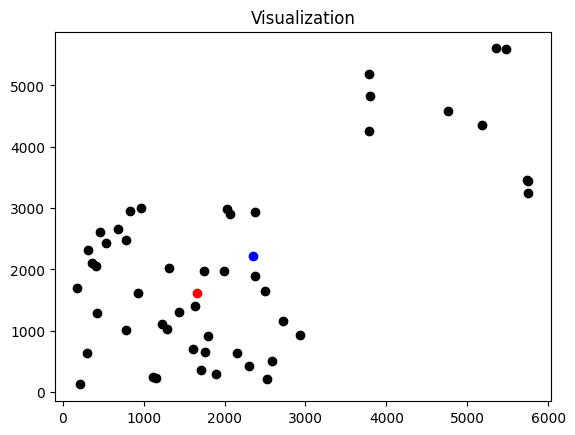

In [7]:
import cvxpy as cp

x_A = cp.Variable(2)
x_B = cp.Variable(2)

# Formulate the problem.
objective = cp.Minimize(gamma*cp.sum([p[i]*alpha*cp.norm(A[:,i] - x_A) for i in range(m)]))

# Constraints
constraints = [
    gamma>0,
    alpha>0
]

# Solve problem.
prob = cp.Problem(objective, constraints)
result = prob.solve()
# Print result.
print(f"Optimal value for A: {result}")
print(f"Optimal x_A: {x_A.value}")

# Formulate the problem.
objective = cp.Minimize(cp.sum([alpha*gamma*p[i]*cp.norm(A[:,i] - x_B) + 
                                p[i]*cp.maximum(0, mu1*(alpha*cp.norm(A[:,i] - x_B) - eta1)) + 
                                p[i]*cp.maximum(0, (mu2-mu1)*(alpha*cp.norm(A[:,i] - x_B) - eta2)) 
                                for i in range(m)]))

# Constraints
constraints = [
    mu1>0,
    mu2>mu1,
    eta1>0,
    eta2>eta1,
    gamma>0
]

# Solve problem.
prob = cp.Problem(objective, constraints)
result = prob.solve()
# Print result.
print(f"Optimal value for B: {result}")
print(f"Optimal x_B: {x_B.value}")

# Plot A_i points in black, x_A in red, x_B in blue
import matplotlib.pyplot as plt
plt.scatter(A[0,:], A[1,:], c='k', label='Shipments')
plt.scatter(x_A.value[0], x_A.value[1], c='r', label='First option for storage location')
plt.scatter(x_B.value[0], x_B.value[1], c='b', label='Second option for storage location')
plt.title("Visualization")
plt.show()
